# Correction EN1 MAP433

##### Q1

Posons $\beta = \begin{pmatrix}
        {\beta_1} \\
        {\beta_2}
         \end{pmatrix}$
et $A = [\begin{matrix}
    \mathbf1 & \mathbf t
\end{matrix}]$

On cherche à minimiser $S = ||\mathbf X-A\beta||^2$

En calculant le gradient de S en $\beta_1$ et $\beta_2$, on obtient comme condition de premier ordre :

$A^\top A\hat\beta - A^\top \mathbf X = 0$

La première ligne nous donne directement la relation $\hat\beta_1 = \bar X - \hat\beta_2 \bar t$

Cette expression revient de plus à $\hat\beta = (A^\top A)^{-1}A^\top \mathbf X$:

Or $A^\top A = \left[\begin{matrix}
    n & n\bar t\\
    n\bar t & ||\mathbf t||^2
\end{matrix}\right]$
et $(A^\top A)^{-1} = \frac{1}{n^2s}\left[\begin{matrix}
    ||\mathbf t||^2 & -\bar t\\
    -\bar t & 1
\end{matrix}\right]$

D'où on déduit $\hat\beta_2 = \frac{\sum_i (t_i-\bar t)X_i}{\sum_i (t_i-\bar t)^2}$

##### Q2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("GLB.Ts+dSST.csv", header=1)

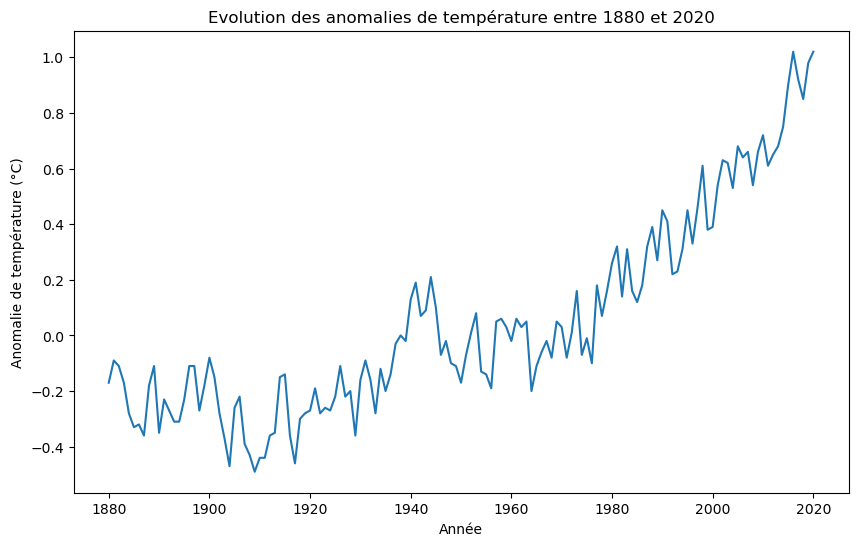

In [3]:
temp = df[df["Year"] <= 2020]

X = temp.iloc[:,13].astype("float64")
T = temp.iloc[:, 0].astype("int64")

plt.figure(figsize=(10,6))
plt.plot([i for i in range(1880,2021)], X)
plt.xlabel("Année")
plt.ylabel("Anomalie de température (°C)")
plt.title("Evolution des anomalies de température entre 1880 et 2020")
plt.show()

##### Q3

In [4]:

beta1_ls = []
beta2_ls = []
sigma2_ls = []

def b2(t, x):
    return np.sum((t - np.mean(t)) * x) / np.sum((t - np.mean(t)) ** 2)

def b1(t, x):
    return np.mean(x) - b2(t, x) * np.mean(t)

def sigma2(t, x):
    return np.sum((x - b1(t, x) - b2(t, x) * t) ** 2) / (np.size(t) - 2)

for j in range(0, 110, 10):
    tj = T[j : j + 40]
    xj = X[j : j + 40]
    a = b1(tj, xj)   
    b = b2(tj, xj)   
    c = sigma2(tj, xj) 
    print(f"{1880+j}-{1880+j+40}: beta1_ls = {a:.2f}, beta2_ls = {b:.4f}, sigma2_ls = {b:.2e}\n ") 

1880-1920: beta1_ls = 7.79, beta2_ls = -0.0042, sigma2_ls = -4.24e-03
 
1890-1930: beta1_ls = 0.20, beta2_ls = -0.0003, sigma2_ls = -2.52e-04
 
1900-1940: beta1_ls = -12.20, beta2_ls = 0.0062, sigma2_ls = 6.23e-03
 
1910-1950: beta1_ls = -22.67, beta2_ls = 0.0117, sigma2_ls = 1.17e-02
 
1920-1960: beta1_ls = -13.53, beta2_ls = 0.0069, sigma2_ls = 6.93e-03
 
1930-1970: beta1_ls = -3.02, beta2_ls = 0.0015, sigma2_ls = 1.53e-03
 
1940-1980: beta1_ls = 0.76, beta2_ls = -0.0004, sigma2_ls = -3.87e-04
 
1950-1990: beta1_ls = -18.30, beta2_ls = 0.0093, sigma2_ls = 9.32e-03
 
1960-2000: beta1_ls = -27.82, beta2_ls = 0.0141, sigma2_ls = 1.41e-02
 
1970-2010: beta1_ls = -34.88, beta2_ls = 0.0177, sigma2_ls = 1.77e-02
 
1980-2020: beta1_ls = -37.29, beta2_ls = 0.0189, sigma2_ls = 1.89e-02
 


##### Q4

L'intervalle aléatoire
$$ \bigg[ \frac{(n-2)\hat{\sigma}^2}{q_{0.975}^{n-2}} ; \frac{(n-2)\hat{\sigma}^2}{q_{0.025}^{n-2}} \bigg]$$

est un intervalle de confiance de niveau 95\% pour $\sigma^2$

Et

$$ \lbrack \hat{\beta}_j - q_{0.975} \hat{\sigma}_j ; \hat{\beta}_j - q_{0.025} \hat{\sigma}_j \rbrack$$

est un intervalle de confiance pour $\beta_j$ où $j = 1,2$.

In [5]:
import scipy.stats as sps
def s1(t, x):
    return sigma2(t, x) * np.sum(t ** 2) / (np.size(t) * np.sum((t - np.mean(t)) ** 2))

def s2(t, x):
    return sigma2(t, x) / np.sum((t - np.mean(t)) ** 2)
    
def intervalledeconfianceBeta1(t, x, alpha):
    q = sps.t.ppf(1 - alpha / 2, np.size(t) - 2) #La loi de student est paire
    b = b1(t, x)
    s = s1(t, x)
    return [b - q * np.sqrt(s), b + q * np.sqrt(s)]

def intervalledeconfianceBeta2(t, x, alpha):
    q = sps.t.ppf(1 - alpha / 2, np.size(t) - 2)
    b = b2(t, x)
    s = s2(t, x)
    return [b - q * np.sqrt(s), b + q * np.sqrt(s)]

def intervalledeconfianceSigma2(t, x, alpha):
    n = np.size(t)
    q_l = sps.chi2.ppf(alpha / 2, n - 2)
    q_r = sps.chi2.ppf(1 - alpha / 2, n - 2)
    s = sigma2(t, x)
    return [(n - 2) * s / q_r, (n - 2) * s / q_l]

for j in range(0, 110, 10):
    tj = T[j : j + 40]
    xj = X[j : j + 40]
    a = b1(tj, xj)   
    b = b2(tj, xj)   
    c = sigma2(tj, xj) 
    print(f"{1880+j}-{1880+j+40}:\n \
    beta1_intervalle = {intervalledeconfianceBeta1(tj, xj, 0.05)},\n \
    beta2_intervalle = {intervalledeconfianceBeta2(tj, xj, 0.05)},\n \
    sigma2_intervalle = {intervalledeconfianceSigma2(tj, xj, 0.05)}\n ") 

1880-1920:
     beta1_intervalle = [2.1086582312246716, 13.471990924497655],
     beta2_intervalle = [-0.00723592314460876, -0.0012537579060479002],
     sigma2_intervalle = [0.007771402369752669, 0.019326368627132755]
 
1890-1930:
     beta1_intervalle = [-5.616342808203124, 6.021549187189991],
     beta2_intervalle = [-0.0032996558593514232, 0.0027949654278317236],
     sigma2_intervalle = [0.008066330905647134, 0.02005981380628623]
 
1900-1940:
     beta1_intervalle = [-18.06837303853086, -6.329942158467259],
     beta2_intervalle = [0.003167516689914847, 0.00928276473597633],
     sigma2_intervalle = [0.008121023004961777, 0.020195825252104626]
 
1910-1950:
     beta1_intervalle = [-28.28197918129357, -17.0593941770554],
     beta2_intervalle = [0.008758872553577584, 0.014575086170625043],
     sigma2_intervalle = [0.0073462090589399886, 0.01826897354300479]
 
1920-1960:
     beta1_intervalle = [-19.78260470716795, -7.271843698085336],
     beta2_intervalle = [0.003703508372210999,

##### Q5


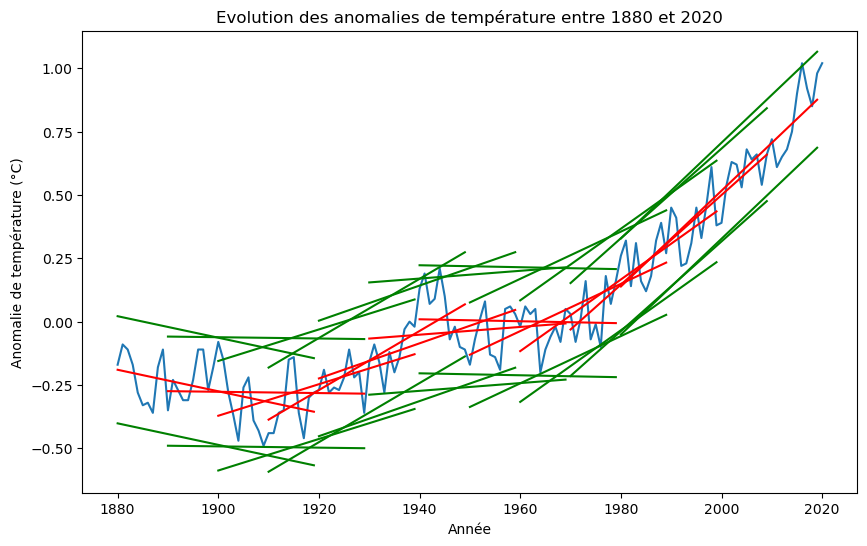

In [6]:
plt.figure(figsize=(10,6))
plt.title("Régressions et intervalles de confiance à 95%")
plt.plot(temp["Year"], X)
for j in range(0, 110, 10):
    tj = T[j : j + 40]
    xj = X[j : j + 40]
    a = b1(tj, xj)   
    b = b2(tj, xj)   
    c = sigma2(tj, xj) 
    
    plt.plot(tj,a + b*tj, 'r')
    incertitude = 1.96 * np.sqrt(c)
    
    plt.plot(tj,a + b*tj+incertitude, 'g')
    plt.plot(tj,a + b*tj-incertitude, 'g')

plt.xlabel("Année")
plt.ylabel("Anomalie de température (°C)")
plt.title("Evolution des anomalies de température entre 1880 et 2020")
plt.show()


**Remarque 1** : Les intervalles de confiance de prédiction sont calculés sur les résidus de prédiction et donc en utilisant les intervalles de confiance sur sigma, pas ceux sur $\beta_1$ et $\beta_2$.

**Remarque 2** : On peut contrôler visuellement que les intervalles à 95% semblent de bonne taille (c'est à dire contiendront 95% des réalisations si on multiplie les tirages sur chaque période).

##### Q6

On visualise les résidus standardisés, définis au chapitre 4.1 du livre de régression avec R.

On note $P$ la matrice de projection
$$
P =T(T^TT)^{-1}T^T,
$$
de sorte que $PX = \hat{X}$.

Les résidus standardisés sont définis par 
$$
t_i = \frac{\hat{\varepsilon}_i}{\hat{\sigma}\sqrt{1-h_{ii}}}
$$
où $h_{ii} = [P_X]_{ii}$.


/var/folders/z4/8pr5tkm96rz9hv_gfp1py8yc0000gn/T/ipykernel_4383/2386934749.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax=plt.subplots()


<Figure size 1200x800 with 0 Axes>

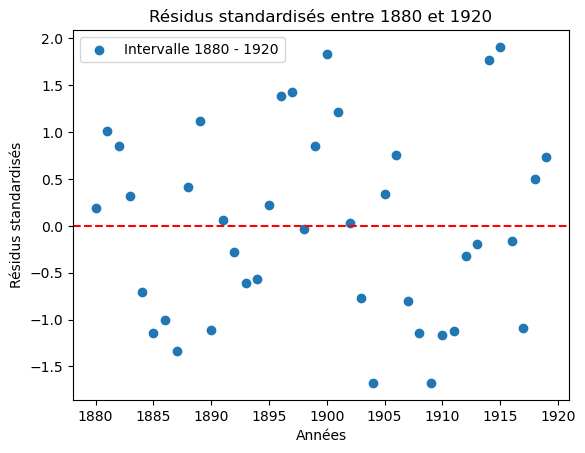

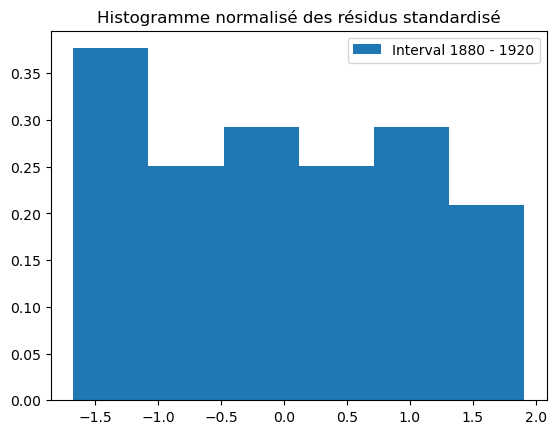

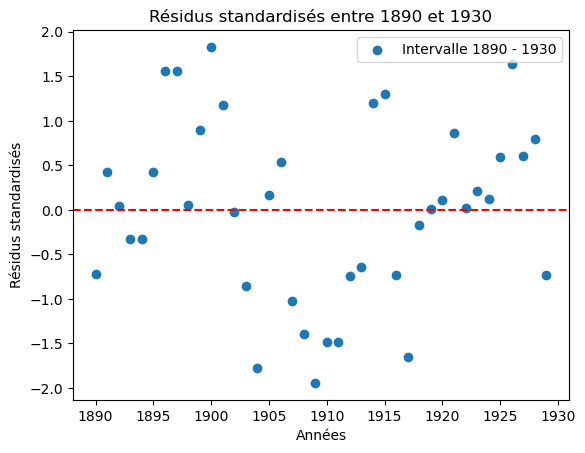

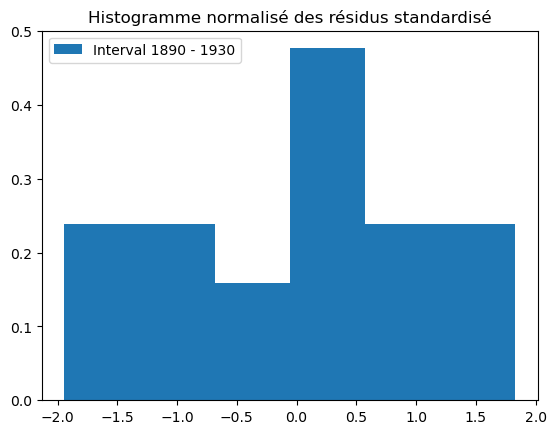

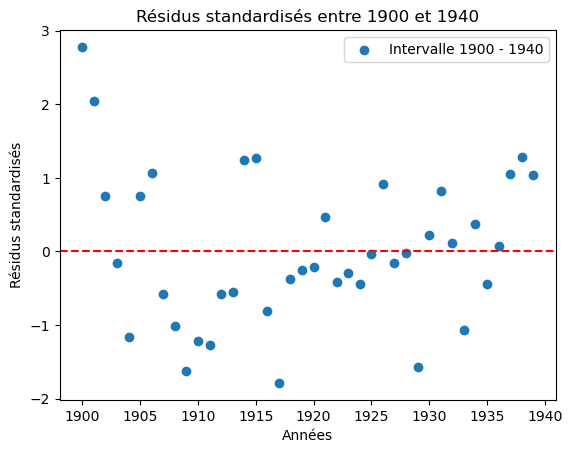

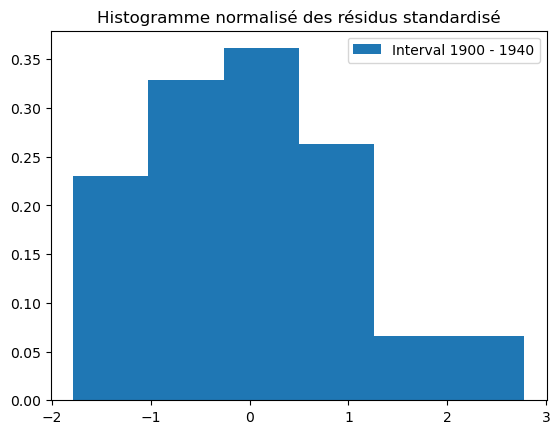

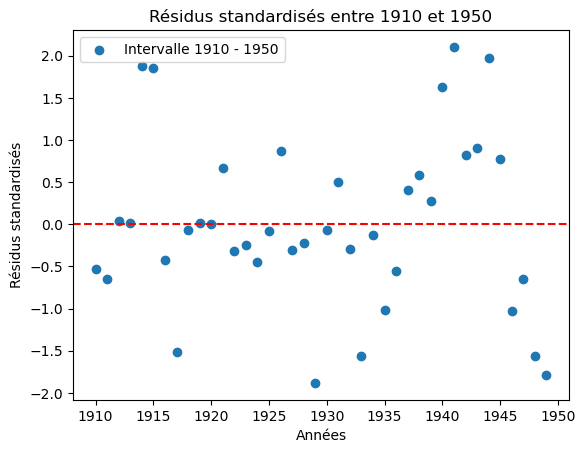

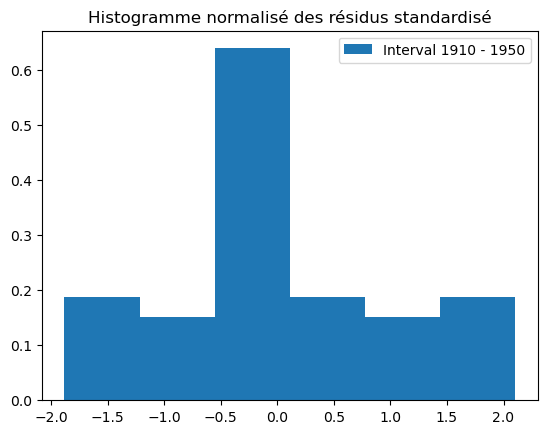

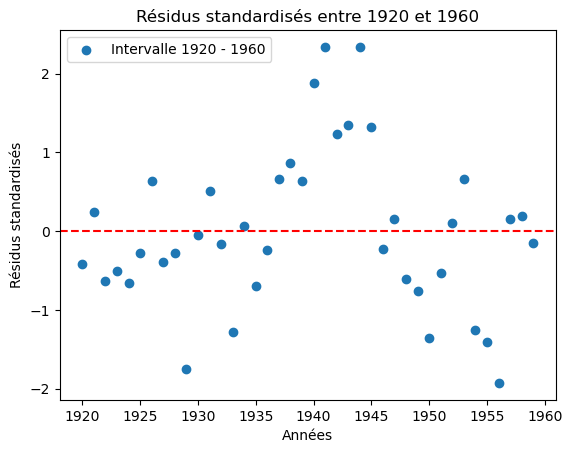

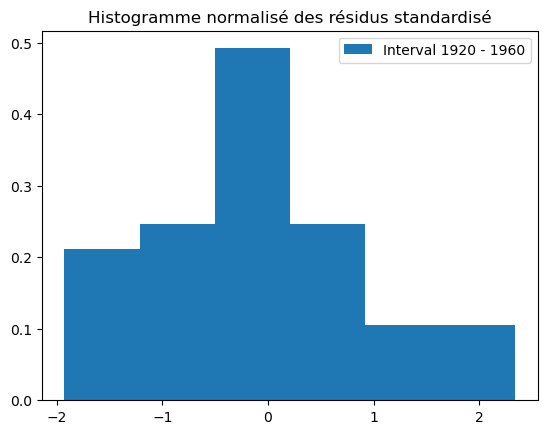

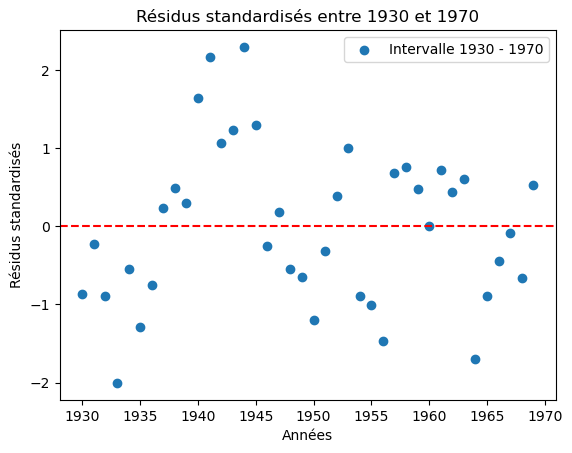

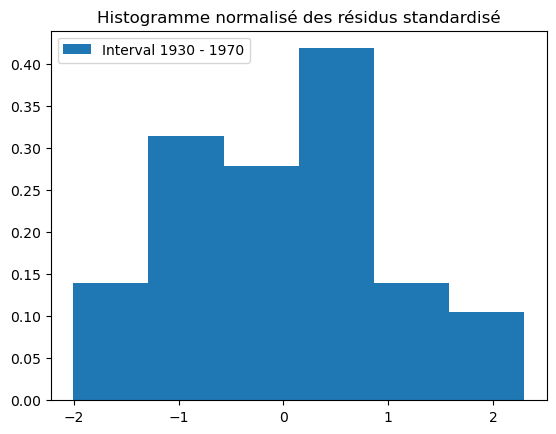

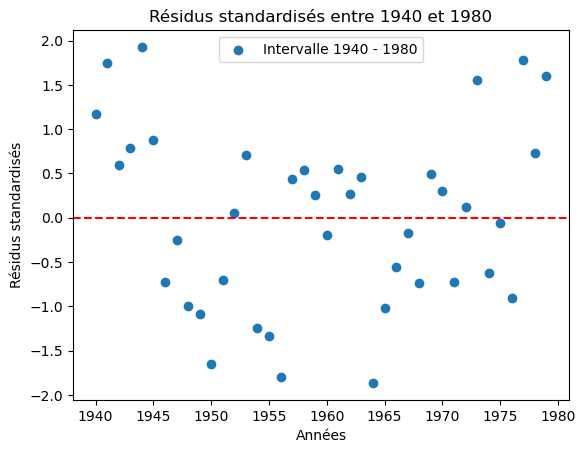

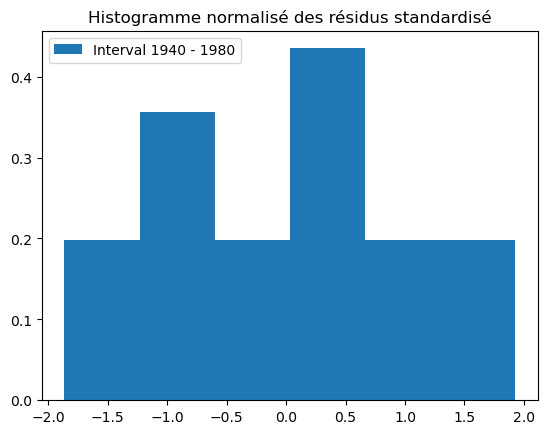

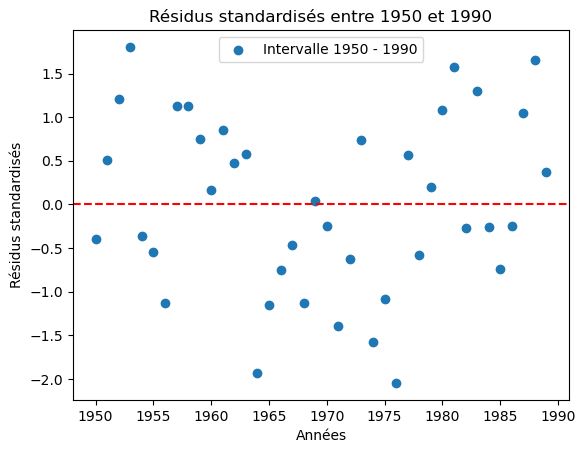

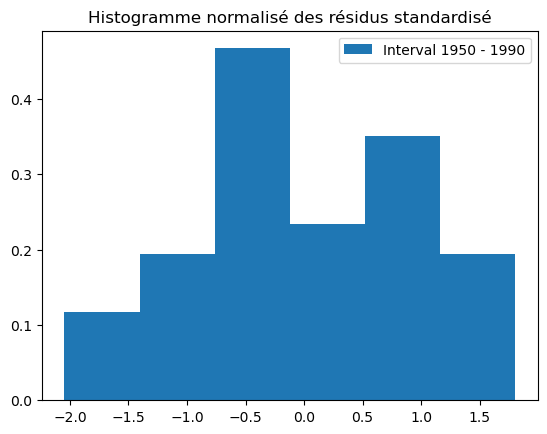

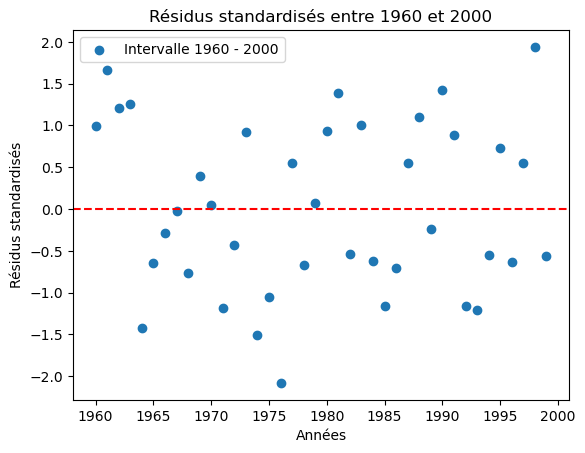

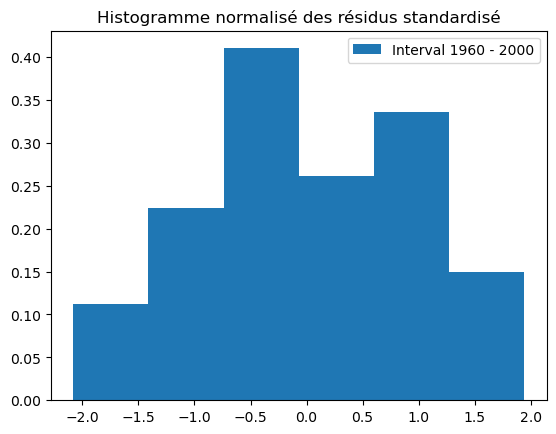

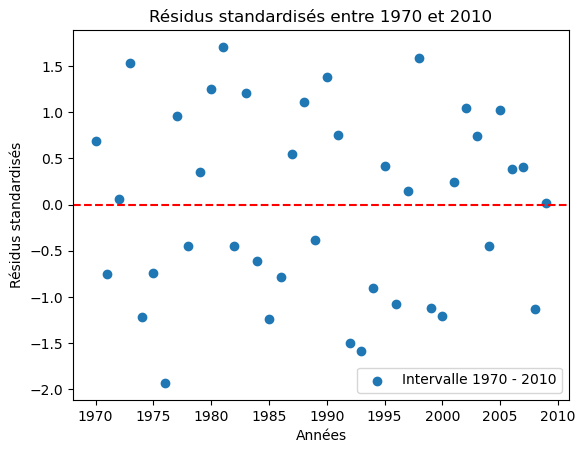

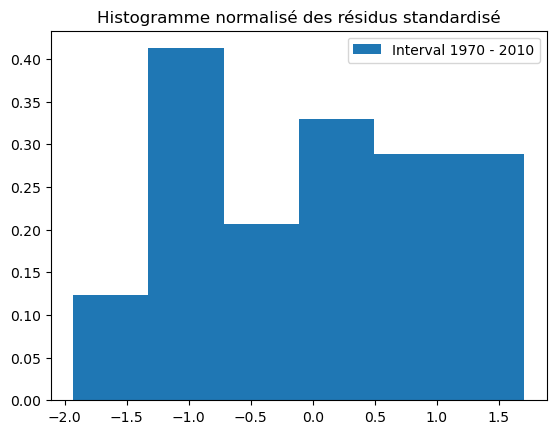

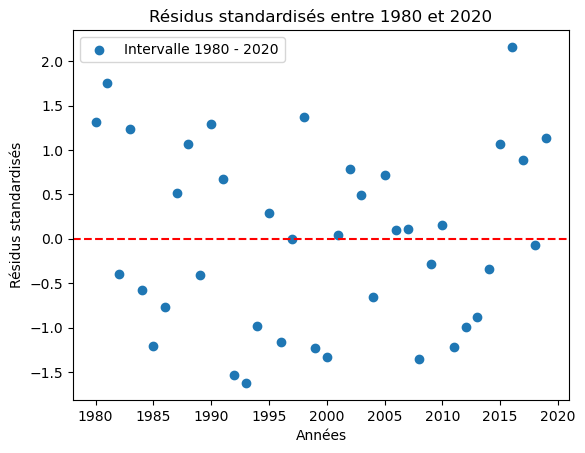

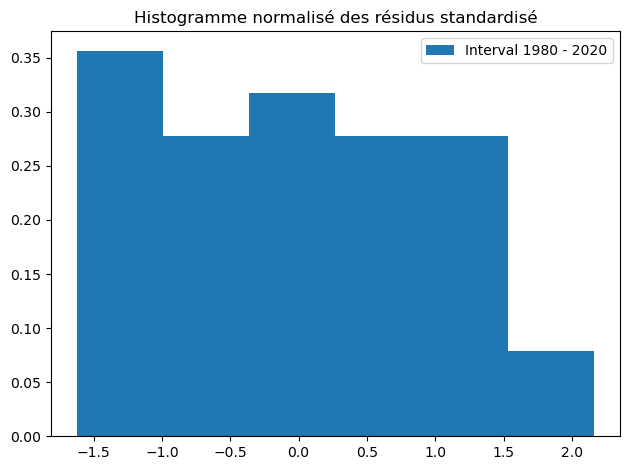

In [7]:
# Calcul des résidus standardisés pour chaque intervalle de 40 ans
def residus_standardises(t,x):
    
    a = b1(t, x)   
    b = b2(t, x)   
    c = sigma2(t, x) 
    xhat = a + b * t
    
    T = np.ones((len(t),2))
    T[:,0]=t
    P = T @ np.linalg.inv(T.T @ T) @ T.T

    res_t = (x - xhat)/np.sqrt(c*(1-np.diag(P)))
    
    return res_t

# Calcul des résidus studentisés

# Tracé des résidus standardisés pour chaque intervalle
plt.figure(figsize=(12, 8))
for j in range(0,110,10):
    tj = T[j : j + 40]
    xj = X[j : j + 40]
    
    res_t_j = residus_standardises(tj,xj)
    
    fig,ax=plt.subplots()
    plt.scatter(tj, res_t_j,
                label=f'Intervalle {1880 + j} - {1880 + j  + 40}')
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Années')
    plt.ylabel('Résidus standardisés')
    plt.title(f"Résidus standardisés entre {1880 + j} et {1880 + j  + 40}")
    plt.legend()
    
    fig,ax=plt.subplots()
    plt.hist(res_t_j,bins=int(40**0.5),
             label=f'Interval {1880 + j} - {1880 + j  + 40}',
            density=True)
    plt.title(f"Histogramme normalisé des résidus standardisé")
    plt.legend()

plt.tight_layout()
plt.show()
    

##### Q7


Les résidus stendardisés étant de loi difficile à calculer, et n'étant pas construction pas indépendant. Construire les résidus studentisés permettrait de comparer leur loi avec une loi de student à n-p degrés de libertés.

Toutefois, les résidus normalisés doivent être de variance unitaire, les résidus standardisé approximant les résidus normalisés on s'attend à ce que leur variance soit du même ordre de grandeur. Ce qui semble ici être le cas.


Lors de ce travail, on a approximé les anomalies anuelles de températures par des regressions linéaires. On constante une pente positive en particulier depuis 1980, traduisant un réchauffement climatique. 



#### Annexe

Pour répondre plus rigoureusement à la question "observe t-on un réchauffement climatique ?", on peut proposer la démarche suivante:

On cherche la p-valeur du test bilatère $ H_0 : {\beta_2} = 0 $ et $ H_1 : {\beta_2} \neq 0$

On considère le test suivant : $ \large\mathbb{1}_{\left\{{\left\lvert\frac{\hat\beta_2 - \beta_2}{\hat\sigma}\right\rvert\;>\;q_{1-\frac{\alpha}{2}}}\right\}} $
où $q_{1-\alpha}$ est le quartile d'ordre $\normalsize 1-\frac{\alpha}{2}$ de la loi de Student à 28 ( $=n-2$ ) degrés de liberté.

Ce test est bien de niveau $\alpha$ car on a sous la proba $\mathbb{P}_0$:
$$\begin{equation}
\begin{aligned}
\mathbb{P}\left(\left\lvert\frac{\hat\beta_2}{\hat\sigma}\right\rvert ~ > ~ q_{1-\frac{\alpha}{2}}\right) & = 2 \mathbb{P}\left(\frac{\hat\beta_2}{\hat\sigma} \: > \: q_{1-\frac{\alpha}{2}}\right) \\
& = 2\left(1 - \Phi\left(q_{1-\frac{\alpha}{2}}\right)\right)\\
& = \alpha
\end{aligned}
\end{equation}
$$
avec $\Phi$ la fonction de répartition de la loi de Student à 28 degrés liberté.

La p-valeur $\normalsize\alpha^*$ cherchée est telle que : $\normalsize q_{1-\frac{\alpha^*}{2}}=\left|\frac{\hat\beta_2}{\hat\sigma_2}\right|$\
Soit : $\normalsize\alpha^* = 2\left(1 - \Phi\left(\left|\frac{\hat\beta_2}{\hat\sigma}\right|\right)\right)$

In [8]:
p_ls = []

for j in range(0, 120, 10):
    tj = T[j : j + 30]
    xj = X[j : j + 30]
    a = b1(tj, xj)   
    b = b2(tj, xj)   
    c = sigma2(tj, xj) 
    
    p_ls.append(2*(1-sps.t.cdf(
        abs(b/s2(tj,xj)**0.5),
        len(tj)-2, loc=0, scale=1))
        )
    print(f"{1880 + j}-{1880 + 30 + j} : p-val = {p_ls[-1]:.2e}")


1880-1910 : p-val = 1.85e-02
1890-1920 : p-val = 8.47e-02
1900-1930 : p-val = 2.94e-01
1910-1940 : p-val = 3.79e-06
1920-1950 : p-val = 7.33e-06
1930-1960 : p-val = 2.22e-01
1940-1970 : p-val = 5.12e-02
1950-1980 : p-val = 3.47e-02
1960-1990 : p-val = 1.49e-06
1970-2000 : p-val = 1.11e-08
1980-2010 : p-val = 3.64e-09
1990-2020 : p-val = 1.75e-11


On remarque qu'à partir de la période 1950-2000 la p-valeur passe sous le seuil des 0.05 et que cette valeur continue de diminuer permettant de rejeter H0 sur chacune des périodes considérée depuis. 

On peut donc affirmer, en remarquant par ailleurs les pentes positives sur ces périodes, qu'on observe un phénomène de réchauffement climatique au cours des dernières décennies. 

Celui-ci devient d'ailleurs de plus en plus difficile à nier ou à remettre en question alors que les p-valeurs diminuent pour atteindre des ordres de grandeur autour de $10^{-10}$.